Youssef ElKashef
Yasmine Kamal

In [44]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, recall_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [45]:
ygain = pd.read_excel("ygain1010.xlsx")
gain = pd.read_excel("gain1010.xlsx", header=None)
sn = pd.concat([ygain, gain], axis=1)

sn.columns = sn.iloc[1]
sn = sn[2:].reset_index(drop=True)
sn.rename(columns={sn.columns[0]: "target"}, inplace=True)
sn.head()

1,target,T01,H01,T02,H02,T11,H11,T12,H12,T21,H21,T22,H22
0,1.0,30.21,43.82,30.16,43.05,30.2,43.79,30.17,43.05,30.19,43.79,30.17,43.05
1,1.0,30.2,43.79,30.17,43.05,30.19,43.79,30.17,43.05,30.19,43.79,30.19,43.12
2,1.0,30.19,43.79,30.17,43.05,30.19,43.79,30.19,43.12,30.19,43.79,30.18,43.09
3,1.0,30.19,43.79,30.19,43.12,30.19,43.79,30.18,43.09,30.19,43.79,30.18,43.09
4,1.0,30.19,43.79,30.18,43.09,30.19,43.79,30.18,43.09,30.19,43.79,30.18,43.09


In [46]:
sn.isnull().sum()

1
target    3
T01       0
H01       0
T02       0
H02       0
T11       0
H11       0
T12       0
H12       0
T21       0
H21       0
T22       0
H22       0
dtype: int64

In [47]:
sn.dropna(subset=['target'], inplace=True)
sn.isnull().sum()

1
target    0
T01       0
H01       0
T02       0
H02       0
T11       0
H11       0
T12       0
H12       0
T21       0
H21       0
T22       0
H22       0
dtype: int64

In [48]:
sn.duplicated().sum()

0

In [49]:
y=sn['target']
x=sn.drop('target', axis=1)

In [50]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2,random_state=42)

In [51]:
scalar = StandardScaler()
x_train=scalar.fit_transform(x_train)
x_test=scalar.transform(x_test)

In [52]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [53]:
y_pred = model.predict(x_test)
print(f"Accuracy: {accuracy_score(y_test,y_pred)*100}%")

Accuracy: 99.35965848452508%


In [54]:
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred))

Confusion Matrix:
[[ 97   3]
 [  3 834]]


Text(50.722222222222214, 0.5, 'Actual')

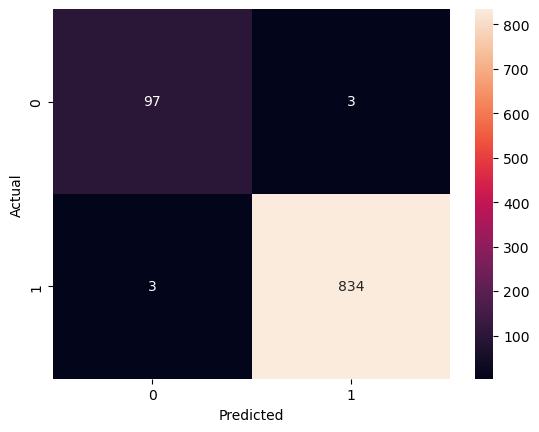

In [55]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [56]:

print(f"Accuracy: {precision_score(y_test,y_pred)*100}%")
print(f"Accuracy: {f1_score(y_test,y_pred)*100}%")
print(f"Accuracy: {recall_score(y_test,y_pred)*100}%")


Accuracy: 99.6415770609319%
Accuracy: 99.6415770609319%
Accuracy: 99.6415770609319%
